### Loading Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
sns.set()

#import from Sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

###  Loading Data

In [2]:
# loading data
het = pd.read_csv("/Data.csv").head(200000)


### Inspect the data

In [3]:
het.shape

(200000, 21)

### Converting DateTime to Age

In [4]:
het['Age'] = het['DATE_OF_BIRTH'].str[-2:]

In [5]:
het["Age1"] = pd.to_numeric(het["Age"])

In [6]:
het["STUDENT_AGE"]=  het['REPORT_YEAR']- (1900+het["Age1"])

In [7]:
het.tail(5)

,LEARNER_ID,DATE_OF_BIRTH,EQUITY,DISABILITY,GENDER,HOME_LANGUAGE,NATIONALITY,RESIDENT_STATUS,LEARNER_PROVINCE,ENROL_STATUS,...,QUALIFICATION_ID,QUALIFICATION_TITLE,NQF_LEVEL,QUALIFICATION_TYPE,CREDITS_TOTAL,LOAD_SUPPLIER,REPORT_YEAR,Age,Age1,STUDENT_AGE
199995,1132278,19/FEB/91,White,None,Female,Afrikaans,South Africa,South Africa,Eastern Cape,Achieved,...,3677,BACHELOR OF SOCIAL WORK,Level 7,National First Degree (Min 480),0,HEMIS,2013,91,91.0,22.0
199996,1132292,25/JUN/90,African,None,Male,tshiVenda,South Africa,South Africa,Gauteng,Achieved,...,8158,N DIP: INDUSTRIAL ENGINEERING,Undefined,National Diploma,0,HEMIS,2014,90,90.0,24.0
199997,1132296,10/JUL/91,African,None,Female,isiZulu,South Africa,South Africa,Kwazulu/Natal,Enrolled,...,5792,BACCALAUREUS COMMERCII,Level 6,National First Degree (Min 360),0,HEMIS,2010,91,91.0,19.0
199998,1132304,06/DEC/90,Coloured,None,Female,English,South Africa,South Africa,Kwazulu/Natal,Achieved,...,318,ND: ENGINEERING: ELECTRICAL,Undefined,National Diploma,0,HEMIS,2014,90,90.0,24.0
199999,1132308,27/JAN/92,African,None,Female,isiZulu,South Africa,South Africa,Kwazulu/Natal,Achieved,...,6422,NATIONAL DIPLOMA:ACCOUNTING,Undefined,National Diploma,0,HEMIS,2014,92,92.0,22.0


### Checking Duplicates and Handling them

In [8]:
duplicate = het[het.duplicated()]
print('CHeck duplicates row below')
duplicate

CHeck duplicates row below


,LEARNER_ID,DATE_OF_BIRTH,EQUITY,DISABILITY,GENDER,HOME_LANGUAGE,NATIONALITY,RESIDENT_STATUS,LEARNER_PROVINCE,ENROL_STATUS,...,QUALIFICATION_ID,QUALIFICATION_TITLE,NQF_LEVEL,QUALIFICATION_TYPE,CREDITS_TOTAL,LOAD_SUPPLIER,REPORT_YEAR,Age,Age1,STUDENT_AGE


### NQF_LEVEL Stats and the Use Case

#### Without Undefined Values from NQF Level

In [9]:
Labelled_data=het[het['NQF_LEVEL']!='Undefined']
Labelled_data.shape

(118523, 24)

In [10]:
Labelled_data.head(4)

,LEARNER_ID,DATE_OF_BIRTH,EQUITY,DISABILITY,GENDER,HOME_LANGUAGE,NATIONALITY,RESIDENT_STATUS,LEARNER_PROVINCE,ENROL_STATUS,...,QUALIFICATION_ID,QUALIFICATION_TITLE,NQF_LEVEL,QUALIFICATION_TYPE,CREDITS_TOTAL,LOAD_SUPPLIER,REPORT_YEAR,Age,Age1,STUDENT_AGE
0,306,11/DEC/72,African,None,Female,seSotho,South Africa,South Africa,Gauteng,Enrolled,...,332,BACCALAUREUS EDUCATION: (HONS): (FET): SPECIAL...,Level 7,Honours Degree,0,HEMIS,2010,72,72.0,38.0
1,310,24/OCT/67,African,None,Female,English,South Africa,South Africa,North West,Achieved,...,6394,ADVANCED CERTIFICATE IN EDUCATI / GEVORDERDE O...,Level 5,National Certificate,0,HEMIS,2012,67,67.0,45.0
2,318,14/JAN/67,African,None,Male,xiTsonga,South Africa,South Africa,Limpopo,Achieved,...,3082,BACHELOR OF AGRICULTURAL MANAGEMENT HONOURS,Level 7,Honours Degree,0,HEMIS,2011,67,67.0,44.0
5,332,08/JUN/66,African,None,Male,isiZulu,South Africa,South Africa,Kwazulu/Natal,Enrolled,...,6399,Ace,Level 5,National Certificate,0,HEMIS,2008,66,66.0,42.0


#### Undefined Values from NQF Level

In [11]:
Undefined= het[het['NQF_LEVEL']=='Undefined']
Undefined.shape

(81477, 24)

In [12]:
Undefined.head(4)

,LEARNER_ID,DATE_OF_BIRTH,EQUITY,DISABILITY,GENDER,HOME_LANGUAGE,NATIONALITY,RESIDENT_STATUS,LEARNER_PROVINCE,ENROL_STATUS,...,QUALIFICATION_ID,QUALIFICATION_TITLE,NQF_LEVEL,QUALIFICATION_TYPE,CREDITS_TOTAL,LOAD_SUPPLIER,REPORT_YEAR,Age,Age1,STUDENT_AGE
3,324,06/AUG/66,African,None,Female,isiXhosa,South Africa,South Africa,Eastern Cape,Enrolled,...,7203,OCCASIONAL STUDIES : MANAGEMENT,Undefined,Unknown,0,HEMIS,2004,66,66.0,38.0
4,328,01/JUN/68,African,None,Female,seSotho,South Africa,South Africa,South Africa National,Enrolled,...,7040,NON-DEGREE PURPOSES,Undefined,Unknown,0,HEMIS,2008,68,68.0,40.0
6,334,05/NOV/71,African,None,Female,xiTsonga,South Africa,South Africa,South Africa National,Achieved,...,2126,BACCALAUREUS TECHNOLOGIAE: PUBLIC MANAGEMENT,Undefined,National First Degree (Min 360),0,HEMIS,2013,71,71.0,42.0
12,376,22/MAY/69,African,None,Male,seSotho,South Africa,South Africa,South Africa National,Enrolled,...,1281,NATIONAL DIPLOMA: SAFETY MANAGEMENT,Undefined,National Diploma,0,HEMIS,2009,69,69.0,40.0


In [13]:
het.NQF_LEVEL.describe()

count        200000
unique            5
top       Undefined
freq          81477
Name: NQF_LEVEL, dtype: object

### Replacing Undefined  and Unknown with NaN

In [14]:
het['NQFL']=het['NQF_LEVEL'].replace('Undefined', np.NaN)
het['QUALIFICATION_TYPE']=het['QUALIFICATION_TYPE'].replace('Unknown', np.NaN)

In [15]:
het.head(5)

,LEARNER_ID,DATE_OF_BIRTH,EQUITY,DISABILITY,GENDER,HOME_LANGUAGE,NATIONALITY,RESIDENT_STATUS,LEARNER_PROVINCE,ENROL_STATUS,...,QUALIFICATION_TITLE,NQF_LEVEL,QUALIFICATION_TYPE,CREDITS_TOTAL,LOAD_SUPPLIER,REPORT_YEAR,Age,Age1,STUDENT_AGE,NQFL
0,306,11/DEC/72,African,None,Female,seSotho,South Africa,South Africa,Gauteng,Enrolled,...,BACCALAUREUS EDUCATION: (HONS): (FET): SPECIAL...,Level 7,Honours Degree,0,HEMIS,2010,72,72.0,38.0,Level 7
1,310,24/OCT/67,African,None,Female,English,South Africa,South Africa,North West,Achieved,...,ADVANCED CERTIFICATE IN EDUCATI / GEVORDERDE O...,Level 5,National Certificate,0,HEMIS,2012,67,67.0,45.0,Level 5
2,318,14/JAN/67,African,None,Male,xiTsonga,South Africa,South Africa,Limpopo,Achieved,...,BACHELOR OF AGRICULTURAL MANAGEMENT HONOURS,Level 7,Honours Degree,0,HEMIS,2011,67,67.0,44.0,Level 7
3,324,06/AUG/66,African,None,Female,isiXhosa,South Africa,South Africa,Eastern Cape,Enrolled,...,OCCASIONAL STUDIES : MANAGEMENT,Undefined,NaN,0,HEMIS,2004,66,66.0,38.0,NaN
4,328,01/JUN/68,African,None,Female,seSotho,South Africa,South Africa,South Africa National,Enrolled,...,NON-DEGREE PURPOSES,Undefined,NaN,0,HEMIS,2008,68,68.0,40.0,NaN


### Dropping features that are more biased

In [16]:
New_het=het.drop(['LEARNER_ID',	'DATE_OF_BIRTH', 'NATIONALITY',	'RESIDENT_STATUS','QUALIFICATION_TITLE','NQF_LEVEL','CREDITS_TOTAL','ENROL_DATE','ENROL_STATUS_DATE','PROVIDER_NAME','NQF_LEVEL','LOAD_SUPPLIER','Age','Age1'], axis=True)

In [17]:
New_het.head()

,EQUITY,DISABILITY,GENDER,HOME_LANGUAGE,LEARNER_PROVINCE,ENROL_STATUS,ENROL_TYPE,QUALIFICATION_ID,QUALIFICATION_TYPE,REPORT_YEAR,STUDENT_AGE,NQFL
0,African,None,Female,seSotho,Gauteng,Enrolled,Residential (Contact) Learning,332,Honours Degree,2010,38.0,Level 7
1,African,None,Female,English,North West,Achieved,Distance Learning,6394,National Certificate,2012,45.0,Level 5
2,African,None,Male,xiTsonga,Limpopo,Achieved,Residential (Contact) Learning,3082,Honours Degree,2011,44.0,Level 7
3,African,None,Female,isiXhosa,Eastern Cape,Enrolled,Residential (Contact) Learning,7203,NaN,2004,38.0,NaN
4,African,None,Female,seSotho,South Africa National,Enrolled,Distance Learning,7040,NaN,2008,40.0,NaN


### summarize the number of rows with missing values for each column

In [18]:

round(het.isnull().mean() * 100,5) # percentage of null values

LEARNER_ID              0.0000
DATE_OF_BIRTH           0.0005
EQUITY                  0.0000
DISABILITY              0.0000
GENDER                  0.0000
HOME_LANGUAGE           0.0000
NATIONALITY             0.0000
RESIDENT_STATUS         0.0000
LEARNER_PROVINCE        0.0000
ENROL_STATUS            0.0000
ENROL_TYPE              0.0000
ENROL_DATE              0.0995
ENROL_STATUS_DATE       0.0000
PROVIDER_NAME           0.0000
QUALIFICATION_ID        0.0000
QUALIFICATION_TITLE     0.0000
NQF_LEVEL               0.0000
QUALIFICATION_TYPE      4.0955
CREDITS_TOTAL           0.0000
LOAD_SUPPLIER           0.0000
REPORT_YEAR             0.0000
Age                     0.0005
Age1                    0.0005
STUDENT_AGE             0.0005
NQFL                   40.7385
dtype: float64

### Showing Unique values from NQFL

In [19]:
New_het.NQFL.unique()

array(['Level 7', 'Level 5', nan, 'Level 6', 'Level 8 and above'],
      dtype=object)

### Replacing NQFL's with (Level n)

In [20]:
df=New_het.replace({"NQFL":{'NQF Level 03':'Level 3','NQF Level 04':'Level 4','NQF Level 01':'Level 1','NQF Level 02':'Level 2','NQF Level 07':'Level 7','NQF Level 05':'Level 5','NQF Level 06':'Level 6',
                            'NQF Level 08':'Level 8','Level N/A: Pre-2009 was L5':'Level 5',
                            'Level N/A: Pre-2009 was L6':'Level 6','Level N/A: Pre-2009 was L7':'Level 7',
                            'Level TBA: Pre-2009 was L7':'Level 7','Level TBA: Pre-2009 was L5':'Level 5',
                            'Level TBA: Pre-2009 was L6':'Level 6','Level N/A: Pre-2009 was L8+':'Level 8+',
                            'NQF Level 10':'Level 10','NQF Level 09':'Level 9','Level 8 and above':'Level L8+',
                            'Level N/A:Pre-2009 was L8+':'Level 8', 'Not Applicable':np.NaN}})

### Showing attributes values unique

In [21]:
df.NQFL.unique()

array(['Level 7', 'Level 5', nan, 'Level 6', 'Level L8+'], dtype=object)

In [22]:
df.QUALIFICATION_ID.unique()

array([ 332, 6394, 3082, ..., 5963, 4041, 2031])

In [23]:
df.QUALIFICATION_TYPE.unique()

array(['Honours Degree', 'National Certificate', nan,
       'National First Degree (Min 360)', 'National Diploma',
       'Masters Degree', 'Doctoral Degree', 'National First Degree)',
       'Post Graduate Diploma', 'PG B Deg (phasing out) eg B Ed',
       'National Higher Certificate', 'National First Degree (Min 480)',
       'National Higher Diploma', 'Higher Certificate', 'Diploma',
       'Advanced Diploma', 'National Masters Diploma'], dtype=object)

In [24]:
df.LEARNER_PROVINCE.unique()

array(['Gauteng', 'North West', 'Limpopo', 'Eastern Cape',
       'South Africa National', 'Kwazulu/Natal', 'Western Cape',
       'Free State', 'Northern Cape', 'Mpumalanga',
       'Outside South Africa'], dtype=object)

In [25]:
df.NQFL.unique()

array(['Level 7', 'Level 5', nan, 'Level 6', 'Level L8+'], dtype=object)

In [26]:
df.ENROL_STATUS.unique()

array(['Enrolled', 'Achieved'], dtype=object)

In [27]:
df.GENDER.unique()

array(['Female', 'Male', 'Unkown'], dtype=object)

### Droping Equity, Disability, Report year and Province

In [28]:
df.drop("EQUITY",axis=1,inplace=True)
df.drop("DISABILITY",axis=1,inplace=True)
df.drop("REPORT_YEAR",axis=1,inplace=True)
df.drop("LEARNER_PROVINCE",axis=1,inplace=True)

### Label encoding 

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])
df['HOME_LANGUAGE'] = le.fit_transform(df['HOME_LANGUAGE'])
df['ENROL_STATUS'] = le.fit_transform(df['ENROL_STATUS'])
df['ENROL_TYPE'] = le.fit_transform(df['ENROL_TYPE'])
df['QUALIFICATION_TYPE'] = le.fit_transform(df['QUALIFICATION_TYPE'])
df['NQFL'] = le.fit_transform(df['NQFL'])

### Creating Another New dataframe to Be used later

In [35]:
New_het=df
New_het['NQFL']=New_het['NQFL'].replace(4, np.NaN)
New_het['QUALIFICATION_TYPE']=New_het['QUALIFICATION_TYPE'].replace(16, np.NaN)
New_het1=New_het

In [36]:
New_het.head(5)

,GENDER,HOME_LANGUAGE,ENROL_STATUS,ENROL_TYPE,QUALIFICATION_ID,QUALIFICATION_TYPE,STUDENT_AGE,NQFL
0,0,9,1,2,332,4.0,38.0,2.0
1,0,1,0,0,6394,6.0,45.0,0.0
2,1,13,0,2,3082,4.0,44.0,2.0
3,0,6,1,2,7203,NaN,38.0,NaN
4,0,9,1,0,7040,NaN,40.0,NaN


### Checking the Info


In [37]:
New_het.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   GENDER              200000 non-null  int64  
 1   HOME_LANGUAGE       200000 non-null  int64  
 2   ENROL_STATUS        200000 non-null  int64  
 3   ENROL_TYPE          200000 non-null  int64  
 4   QUALIFICATION_ID    200000 non-null  int64  
 5   QUALIFICATION_TYPE  191809 non-null  float64
 6   STUDENT_AGE         199999 non-null  float64
 7   NQFL                118523 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 12.2 MB


### Checking the Missing Values 

In [38]:
print(New_het.isnull().sum())

GENDER                    0
HOME_LANGUAGE             0
ENROL_STATUS              0
ENROL_TYPE                0
QUALIFICATION_ID          0
QUALIFICATION_TYPE     8191
STUDENT_AGE               1
NQFL                  81477
dtype: int64


### Importing MinMaxScaler and Normalise the data

In [39]:
# standardize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Data = pd.DataFrame(scaler.fit_transform(New_het), columns = New_het.columns)
Data=Data.drop(['ENROL_TYPE'], axis=True)
Data.head()

,GENDER,HOME_LANGUAGE,ENROL_STATUS,QUALIFICATION_ID,QUALIFICATION_TYPE,STUDENT_AGE,NQFL
0,0.0,0.692308,1.0,0.026307,0.266667,0.27,0.666667
1,0.0,0.076923,0.0,0.509566,0.400000,0.34,0.000000
2,0.5,1.000000,0.0,0.245536,0.266667,0.33,0.666667
3,0.0,0.461538,1.0,0.574059,NaN,0.27,NaN
4,0.0,0.692308,1.0,0.561065,NaN,0.29,NaN


### Declaring target

In [40]:
y= New_het['ENROL_TYPE']
y.shape

(200000,)

### Dropping raws with NaN (Dealing with Missing Values)

In [41]:
Data=Data.dropna(axis=1)

### Split data in to Training and Test

In [42]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (134000, 4) (134000,)
Test (66000, 4) (66000,)


### Using Chi Square Feature Selection 

In [43]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 245.243428
Feature 1: 91.964028
Feature 2: 4693.354551
Feature 3: 1794.520514


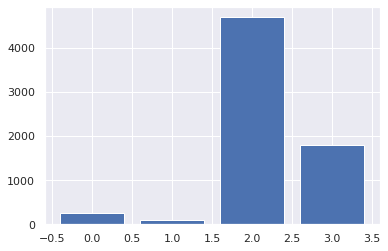

In [44]:
# scores for the featuresX_test
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Fitting Logistic Regression after (Removing : NaNs)

In [45]:
# fit the model
model = LogisticRegression(multi_class = 'multinomial', solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

### Accuracy in percentages

In [46]:
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 67.41


### Mutual info class feature (Removing NaNs)

In [47]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=3)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

In [48]:
# feature selection
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.30


### Decision Tree Classifier  (Removing NaNs)

In [49]:
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
#cm

In [50]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28335
           1       0.00      0.00      0.00         9
           2       0.99      0.99      0.99     37656

    accuracy                           0.99     66000
   macro avg       0.66      0.66      0.66     66000
weighted avg       0.99      0.99      0.99     66000



### Random Forest (Removing NaNs)

In [53]:
'''from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)'''

'from sklearn import model_selection\n# random forest model creation\nrfc = RandomForestClassifier()\nrfc.fit(X_train,y_train)\n# predictions\nrfc_predict = rfc.predict(X_test)'

In [54]:
'''#print(confusion_matrix(y_test, rfc_predict))
print('\n')
print(classification_report(y_test, rfc_predict))'''

"#print(confusion_matrix(y_test, rfc_predict))\nprint('\n')\nprint(classification_report(y_test, rfc_predict))"

### Gradient Boost  (Removing NaNs)

In [55]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [56]:
# gradient booster model creation
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
# predictions
gbc_predict = gbc.predict(X_test)

In [57]:
print(confusion_matrix(y_test, gbc_predict))
print('\n')
print(classification_report(y_test, gbc_predict))

[[24258     1  4076]
 [    0     1     8]
 [  956     4 36696]]


              precision    recall  f1-score   support

           0       0.96      0.86      0.91     28335
           1       0.17      0.11      0.13         9
           2       0.90      0.97      0.94     37656

    accuracy                           0.92     66000
   macro avg       0.68      0.65      0.66     66000
weighted avg       0.93      0.92      0.92     66000



## Imputation using MICE

### Importing IterativeImputer

In [58]:
# importing the IterativeImputer
from fancyimpute import IterativeImputer as MICE

In [59]:
New_het1.head(5)

,GENDER,HOME_LANGUAGE,ENROL_STATUS,ENROL_TYPE,QUALIFICATION_ID,QUALIFICATION_TYPE,STUDENT_AGE,NQFL
0,0,9,1,2,332,4.0,38.0,2.0
1,0,1,0,0,6394,6.0,45.0,0.0
2,1,13,0,2,3082,4.0,44.0,2.0
3,0,6,1,2,7203,NaN,38.0,NaN
4,0,9,1,0,7040,NaN,40.0,NaN


### Instantiating MICE 

In [60]:
m=MICE()

### Fitting the Model

In [61]:
df_MICE=m.fit_transform(New_het)

In [62]:
df_MICE.shape

(200000, 8)

### Coverting Imputed data to dataframe 

In [63]:
df1=pd.DataFrame(df_MICE)

### Declaring Target

In [64]:
#Declaring target
y= df_MICE[:, 3]
y.shape

(200000,)

### Droping the Independent Variables from the Dataframe

In [65]:
X = New_het=df1.drop([3], axis=True)
X.head()

,0,1,2,4,5,6,7
0,0.0,9.0,1.0,332.0,4.000000,38.0,2.000000
1,0.0,1.0,0.0,6394.0,6.000000,45.0,0.000000
2,1.0,13.0,0.0,3082.0,4.000000,44.0,2.000000
3,0.0,6.0,1.0,7203.0,6.882071,38.0,1.631806
4,0.0,9.0,1.0,7040.0,7.040504,40.0,1.091070


In [66]:
X.shape

(200000, 7)

### Scaling data using MinMax data

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,0,1,2,4,5,6,7
0,0.0,0.692308,1.0,0.026307,0.266667,0.27,0.678134
1,0.0,0.076923,0.0,0.509566,0.400000,0.34,0.034402
2,0.5,1.000000,0.0,0.245536,0.266667,0.33,0.678134
3,0.0,0.461538,1.0,0.574059,0.458805,0.27,0.559625
4,0.0,0.692308,1.0,0.561065,0.469367,0.29,0.385580


### Split data in to traina and test

In [68]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (134000, 7) (134000,)
Test (66000, 7) (66000,)


### Using Chi square to Select best Features

In [69]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 245.243428
Feature 1: 91.964028
Feature 2: 4693.354551
Feature 3: 1794.520514
Feature 4: 3.863023
Feature 5: 997.148405
Feature 6: 1412.733179


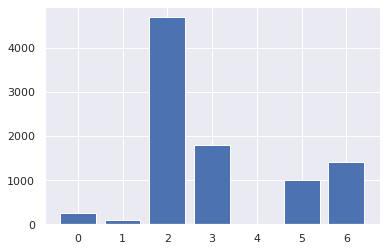

In [70]:
# scores for the featuresX_test
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### MICE : Logistic Regression

In [71]:
## fit the model
model = LogisticRegression(multi_class = 'multinomial', solver='lbfgs')
model.fit(X_train, y_train)

## evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 78.74


/home/phillemon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### MICE: Decision Tree Classifier



In [72]:
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [73]:
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

In [74]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     28335
         1.0       0.00      0.00      0.00         9
         2.0       0.99      0.99      0.99     37656

    accuracy                           0.99     66000
   macro avg       0.66      0.66      0.66     66000
weighted avg       0.99      0.99      0.99     66000



###  MICE : Gradient Boosting



In [75]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [76]:
# gradient booster model creation
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
# predictions
gbc_predict = gbc.predict(X_test)

In [77]:
print(confusion_matrix(y_test, gbc_predict))
print('\n')
print(classification_report(y_test, gbc_predict))

[[27270    39  1026]
 [    1     4     4]
 [  934    68 36654]]


              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     28335
         1.0       0.04      0.44      0.07         9
         2.0       0.97      0.97      0.97     37656

    accuracy                           0.97     66000
   macro avg       0.66      0.79      0.67     66000
weighted avg       0.97      0.97      0.97     66000



## KNN Imputation

### Imparting KNN from fancy impute

In [78]:
from fancyimpute import KNN

In [79]:
New_het1.head()

,GENDER,HOME_LANGUAGE,ENROL_STATUS,ENROL_TYPE,QUALIFICATION_ID,QUALIFICATION_TYPE,STUDENT_AGE,NQFL
0,0,9,1,2,332,4.0,38.0,2.0
1,0,1,0,0,6394,6.0,45.0,0.0
2,1,13,0,2,3082,4.0,44.0,2.0
3,0,6,1,2,7203,NaN,38.0,NaN
4,0,9,1,0,7040,NaN,40.0,NaN


### Selecting the first 15000 due to memory isues

In [80]:
New_het=New_het1.head(15000)

In [81]:
New_het.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GENDER              15000 non-null  int64  
 1   HOME_LANGUAGE       15000 non-null  int64  
 2   ENROL_STATUS        15000 non-null  int64  
 3   ENROL_TYPE          15000 non-null  int64  
 4   QUALIFICATION_ID    15000 non-null  int64  
 5   QUALIFICATION_TYPE  14183 non-null  float64
 6   STUDENT_AGE         15000 non-null  float64
 7   NQFL                8825 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 937.6 KB


### instantiate KNN

In [82]:
imputer = KNN()

### impute data and convert 

In [83]:
encode_data = pd.DataFrame(np.round(imputer.fit_transform(New_het)),columns = New_het.columns)

Imputing row 1/15000 with 0 missing, elapsed time: 30.659
Imputing row 101/15000 with 0 missing, elapsed time: 30.660
Imputing row 201/15000 with 0 missing, elapsed time: 30.662
Imputing row 301/15000 with 0 missing, elapsed time: 30.664
Imputing row 401/15000 with 0 missing, elapsed time: 30.665
Imputing row 501/15000 with 0 missing, elapsed time: 30.667
Imputing row 601/15000 with 0 missing, elapsed time: 30.669
Imputing row 701/15000 with 0 missing, elapsed time: 30.671
Imputing row 801/15000 with 0 missing, elapsed time: 30.673
Imputing row 901/15000 with 0 missing, elapsed time: 30.674
Imputing row 1001/15000 with 0 missing, elapsed time: 30.676
Imputing row 1101/15000 with 0 missing, elapsed time: 30.679
Imputing row 1201/15000 with 0 missing, elapsed time: 30.680
Imputing row 1301/15000 with 2 missing, elapsed time: 30.682
Imputing row 1401/15000 with 2 missing, elapsed time: 30.684
Imputing row 1501/15000 with 0 missing, elapsed time: 30.686
Imputing row 1601/15000 with 1 missi

In [84]:
encode_data.head()

,GENDER,HOME_LANGUAGE,ENROL_STATUS,ENROL_TYPE,QUALIFICATION_ID,QUALIFICATION_TYPE,STUDENT_AGE,NQFL
0,0.0,9.0,1.0,2.0,332.0,4.0,38.0,2.0
1,0.0,1.0,0.0,0.0,6394.0,6.0,45.0,0.0
2,1.0,13.0,0.0,2.0,3082.0,4.0,44.0,2.0
3,0.0,6.0,1.0,2.0,7203.0,5.0,38.0,3.0
4,0.0,9.0,1.0,0.0,7040.0,9.0,40.0,2.0


### Declaring target

In [85]:
y= encode_data['ENROL_TYPE']
y.shape

(15000,)

### Droping Enrol Status from the datframe

In [86]:
X = New_het=encode_data.drop(['ENROL_TYPE'], axis=True)
X.head()

,GENDER,HOME_LANGUAGE,ENROL_STATUS,QUALIFICATION_ID,QUALIFICATION_TYPE,STUDENT_AGE,NQFL
0,0.0,9.0,1.0,332.0,4.0,38.0,2.0
1,0.0,1.0,0.0,6394.0,6.0,45.0,0.0
2,1.0,13.0,0.0,3082.0,4.0,44.0,2.0
3,0.0,6.0,1.0,7203.0,5.0,38.0,3.0
4,0.0,9.0,1.0,7040.0,9.0,40.0,2.0


### Scalling using Min Max Scaler

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,GENDER,HOME_LANGUAGE,ENROL_STATUS,QUALIFICATION_ID,QUALIFICATION_TYPE,STUDENT_AGE,NQFL
0,0.0,0.692308,1.0,0.038897,0.153846,0.541667,0.666667
1,0.0,0.076923,0.0,0.753418,0.307692,0.687500,0.000000
2,1.0,1.000000,0.0,0.363036,0.153846,0.666667,0.666667
3,0.0,0.461538,1.0,0.848774,0.230769,0.541667,1.000000
4,0.0,0.692308,1.0,0.829562,0.538462,0.583333,0.666667


### Split Data in to Train and Test

In [88]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (10050, 7) (10050,)
Test (4950, 7) (4950,)


### Using Chi Square to selct best features

In [89]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 68.700108
Feature 1: 5.275161
Feature 2: 236.034554
Feature 3: 148.205844
Feature 4: 15.262972
Feature 5: 22.688251
Feature 6: 202.320728


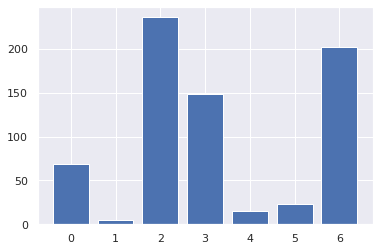

In [90]:
# scores for the featuresX_test
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### KNN : Logistic Regresssion

In [91]:
# fit the model
model = LogisticRegression(multi_class = 'multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.01


### KNN: Decision Tree Classifier



In [92]:
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [93]:
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

In [94]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      3153
         1.0       0.00      0.00      0.00         3
         2.0       0.94      0.91      0.92      1794

    accuracy                           0.94      4950
   macro avg       0.63      0.62      0.63      4950
weighted avg       0.94      0.94      0.94      4950



###  KNN : Gradient Boosting

In [95]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

# gradient booster model creation
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
# predictions
gbc_predict = gbc.predict(X_test)

print(confusion_matrix(y_test, gbc_predict))
print('\n')
print(classification_report(y_test, gbc_predict))

[[2966    4  183]
 [   1    0    2]
 [ 221    4 1569]]


              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      3153
         1.0       0.00      0.00      0.00         3
         2.0       0.89      0.87      0.88      1794

    accuracy                           0.92      4950
   macro avg       0.61      0.61      0.61      4950
weighted avg       0.92      0.92      0.92      4950

